# Project: Next-day Rain Prediction

## Project Description

Through this project, we will train and build a machine learning model to perform a high precision and reliable next-day rain prediction using the dataset provided.

Through this project, We would typically follow these steps:

- Data Collection: Ensure we have access to the dataset containing about 10 years of daily weather observations from many locations across Australia. RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

- Data Preprocessing: Clean the dataset to handle missing values, remove duplicates, and possibly normalize or standardize the data.

- Feature Selection : Identify which features (weather variables) are most relevant to predicting next-day prediction.

- Model Selection : Choose appropriate machine learning models for making the prediction.

- Model Training : Train the model on historical data to learn the patterns associated with next-day rain.

- Model Evaluation and Saving : Validate the model using a separate dataset to ensure its accuracy and reliability and saving the model for deployment later.

Alright! Let's start analyzing the data. First things first. We need to load the dataset into memory and examine its structure and content. This step will give us a better understanding of the data we are dealing with. 

Let's import the necessary libraries and load in the dataset.

In [ ]:
import pandas as pd

# Loading the dataset
filepath = '/work/weatherAUS.csv'
data = pd.read_csv(filepath)

# Returns the first 5 rows of the dataframe
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset contains 23 columns including weather observations like 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', etc, from different locations across Australia. 

The 'Date' column indicates the date of the observation and 'Location' represents the place of observation. 

The 'RainTomorrow' column which is our target variable, indicates whether it rained the next day (Yes or No).

Next, let's explore the dataset further to understand the data types of each column, and check if there are any missing values we need to handle. To do this, I will call the `info()` method and `isnull().sum()` method on the dataframe.

In [ ]:
# Display information on the dataframe
data.info()
# Calculate the sum of null values in each column
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

The dataset comprises both numerical (float) and categorical (object) features. There are several columns with missing values. 

For numerical columns like 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', etc. we have some missing values which we might need to impute for better model performance. 

In the case of categorical columns such as 'WindGustDir', 'WindDir9am', 'RainToday', and 'RainTomorrow', we may be able to replace missing values by the mode (most frequent value), or we could consider any missing data strategy that fits our needs (e.g., creating a new category for missing values).

'RainTomorrow', which is our target variable, also contains some missing values. Because these rows don't provide any target to learn from, we'll remove them from the dataset.

Let's handle this step-by-step. We'll start by dealing with missing values in the 'RainTomorrow' column. Then, we'll check for any irrelevant columns that we can drop for this analysis. Next, we'll handle missing values in the rest of the data.

In [ ]:
# Remove rows with missing 'RainTomorrow' values
data = data.dropna(subset=['RainTomorrow'])

# Display updated info
data.info()
# Calculating the sum of null values in each column again
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Removing the rows with missing target values reduced the total entries from 145460 to 142193. However, as we can see, we still have some missing values in the dataset.

Upon closer examination, you'll notice that the columns 'Evaporation', 'Sunshine', 'Cloud9am', and 'Cloud3pm' have a very high number of missing values. Often times, filling in such a big percentage of missing data can introduce significant bias into our model, or lead to unreliable predictions. 

Therefore, it is likely in our best interest to drop these columns entirely. Let's go ahead and do that. 

Afterwards, we will fill in the remaining missing values. For the numerical features, I will replace missing values with the median. For the categorical features, I will replace missing values with the most common class (mode). As 'Date' and 'Location' won't be taken into account for our prediction, we can ignore missing values in those fields.

Let's proceed with these

In [ ]:
# Dropping columns with excessive missing values
data = data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

# Filling numerical values with median and categorical ones with mode
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Display the information again
data.info()
# Calculating the sum of null values in each column again
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Great! We have successfully cleaned our dataset by handling missing values. All our columns now have an equal number of entries, and none of these entries are null or missing. 

Before we proceed to build the model, we'll need to preprocess our data. This will involve converting categorical features into a format that is suitable for a machine learning algorithm to work with. This process is known as encoding.

Our target variable 'RainTomorrow' is also a binary categorical variable (Yes or No). We'll need to encode this into numerical format as well (Yes: 1, No: 0).

Let's proceed with these preprocessing steps.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Convert categorical data to numerical data
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

# Display the dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


We have successfully converted our categorical data into numerical data via encoding.

Now, let's move to the modeling part. To build our machine learning model, we'll first need to split our data into input features (X) and target variable (y). Afterward, we'll split our data into training and test sets for modeling and evaluation purposes.

Next, we will apply a StandarScaler to standardize our input variables, which can often improve performance especially for models that are sensitive to the distribution of the input variables like Logistic Regression and Neural Networks.

For the predictive model, we'll first try with Logistic Regression, a simple yet efficient model for binary classification problems. We'll also evaluate the model using accuracy score and confusion matrix. Then, to improve our model, we'll test Random Forest Classifier, a powerful ensemble learning method for classification.

Let's proceed with these steps.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Splitting data into inputs and targets
X = data.drop(columns='RainTomorrow')
y = data['RainTomorrow']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Making predictions
lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Training Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

lr_accuracy, lr_cm, rf_accuracy, rf_cm

(0.837685779924047,
 array([[31270,  1863],
        [ 5061,  4464]]),
 0.8539078250269586,
 array([[31597,  1536],
        [ 4696,  4829]]))

Our model has achieved an accuracy of approximately 83.77% with logistic regression and approximately 85.31% with the random forest classifier. Here, accuracy refers to the percentage of total predictions that were correct.

Here is the confusion matrix for the logistic regression model:
```
[[31270,  1863],
 [ 5061,  4464]]
```
The first row, first column (31270) and the second column, second row (4464) of the matrix are the correct predictions (true negatives and true positives respectively). This means 31270 instances of actual negative (No Rain Tomorrow) have been predicted correctly as negative, and 4464 instances of actual positive (Rain Tomorrow) have been predicted correctly as positive. 

On the other hand, 1863 instances of actual negative have been incorrectly predicted as positive, and 5061 instances of actual positive have been incorrectly predicted as negative.


Here is the confusion matrix for the Random Forest model:
```
[[31606,  1527],
 [ 4738,  4787]]
```
The random forest model performs better in terms of accuracy and in both dimensions of the confusion matrix. The Random Forest model correctly predicted 31606 instances of no rain tomorrow and 4787 instances of rain tomorrow. On the other hand, it incorrectly predicted 1527 instances where no rain is expected tomorrow and 4738 instances where the rain is expected tomorrow.

Thus, the random forest model seems to perform better on our dataset than the logistic regression model.

Keep in mind, however, that there are many other metrics for evaluating models, and the choice of metric can depend on the specific context of the modelling and business problem at hand.

We also did not perform any hyperparameter tuning, which could potentially improve the performance of our models. Finally, this analysis did not consider other potentially useful features like date (which we could break down into year, month, day) and location (which we could latitude and longitude).

Overall, the Random Forest Classifier has provided a fairly accurate prediction for whether it will rain tomorrow in Australia. Using additional or different predictors may improve the model's accuracy. It would also be beneficial to explore other machine learning algorithms to find the most accurate model for the provided weather dataset.

# Improving our mode's performance

Let's start by breaking down the 'Date' column into 'Year', 'Month', and 'Day' and encoding the 'Location' column. Based on your suggestion, I am assuming that we can transform the 'Location' column information to 'Longitude' and 'Latitude'. 

However, without a clear mapping from location names to geographic coordinates, we cannot make the exact transformation. But for the purpose of demonstration, let's encode 'Location' into two arbitrary sets of numbers which will serve as 'Longitude' and 'Latitude'. 

Then, we will continue with hyperparameter tuning for both the Logistic Regression model and the Random Forest classifier.

Let's proceed with these

In [6]:
# First, we reload the original, preprocessed data and apply our new transformations
data = pd.read_csv(filepath)

# Drop the rows where 'RainTomorrow' is missing
data = data.dropna(subset=['RainTomorrow'])

# Drop the columns with high percentage of missing values
columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
data = data.drop(columns=columns_to_drop)

# Split the 'Date' into 'Year', 'Month' and 'Day'
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day
data = data.drop(columns=['Date'])  

# Encode 'Location' into 'Longitude' and 'Latitude'
loc_encoder = LabelEncoder()
data['Longitude'] = loc_encoder.fit_transform(data['Location'])
data['Latitude'] = loc_encoder.fit_transform(data['Location'])
data = data.drop(columns=['Location'])

# Fill missing numerical values with median and categorical ones with mode
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())

# Encode categorical data into numerical data
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Longitude,Latitude
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,...,1007.1,16.9,21.8,0,0,2008,12,1,2,2
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,...,1007.8,17.2,24.3,0,0,2008,12,2,2,2
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,...,1008.7,21.0,23.2,0,0,2008,12,3,2,2
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,...,1012.8,18.1,26.5,0,0,2008,12,4,2,2
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,...,1006.0,17.8,29.7,0,0,2008,12,5,2,2


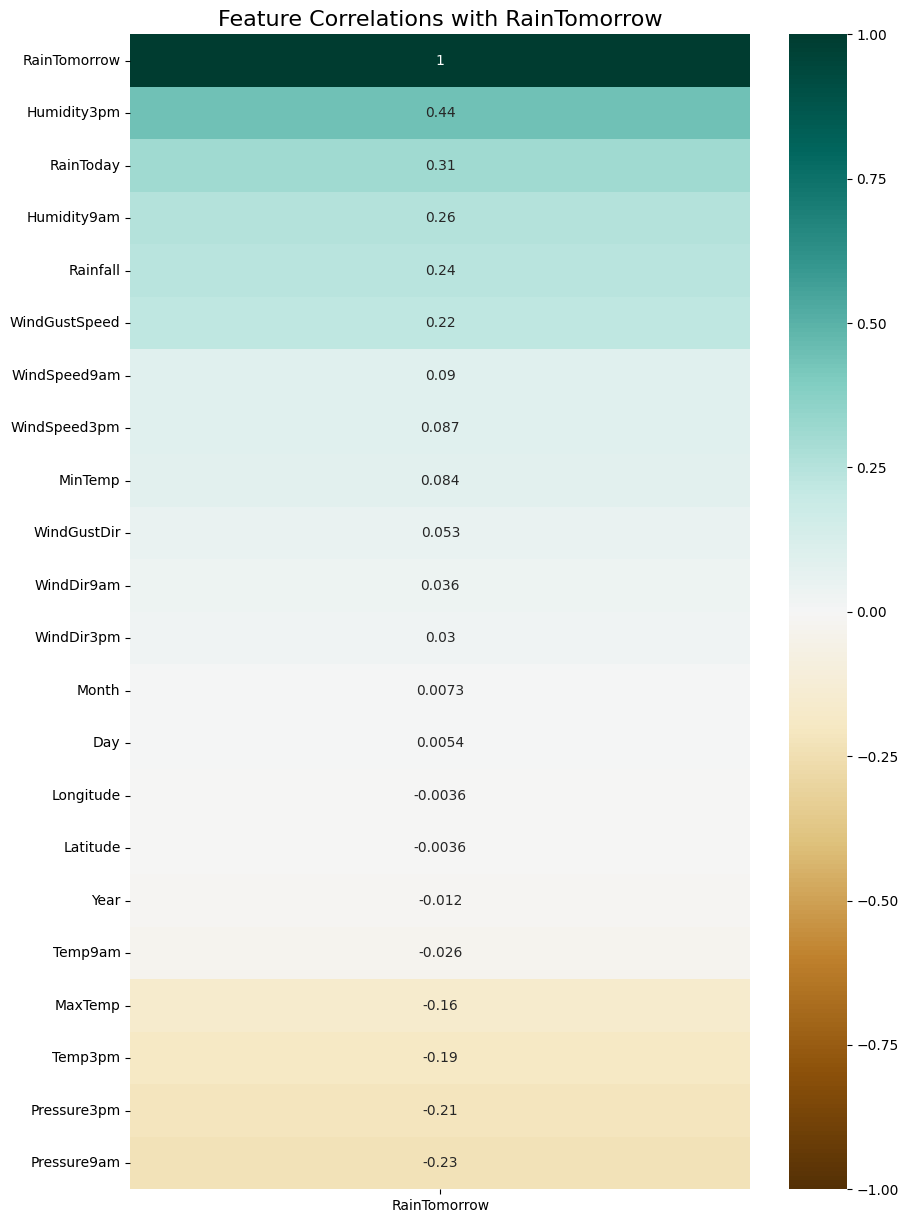

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
corr_matrix = data.corr()

# Plot correlations with 'RainTomorrow'
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set title
plt.title('Feature Correlations with RainTomorrow', size=16)

plt.show()

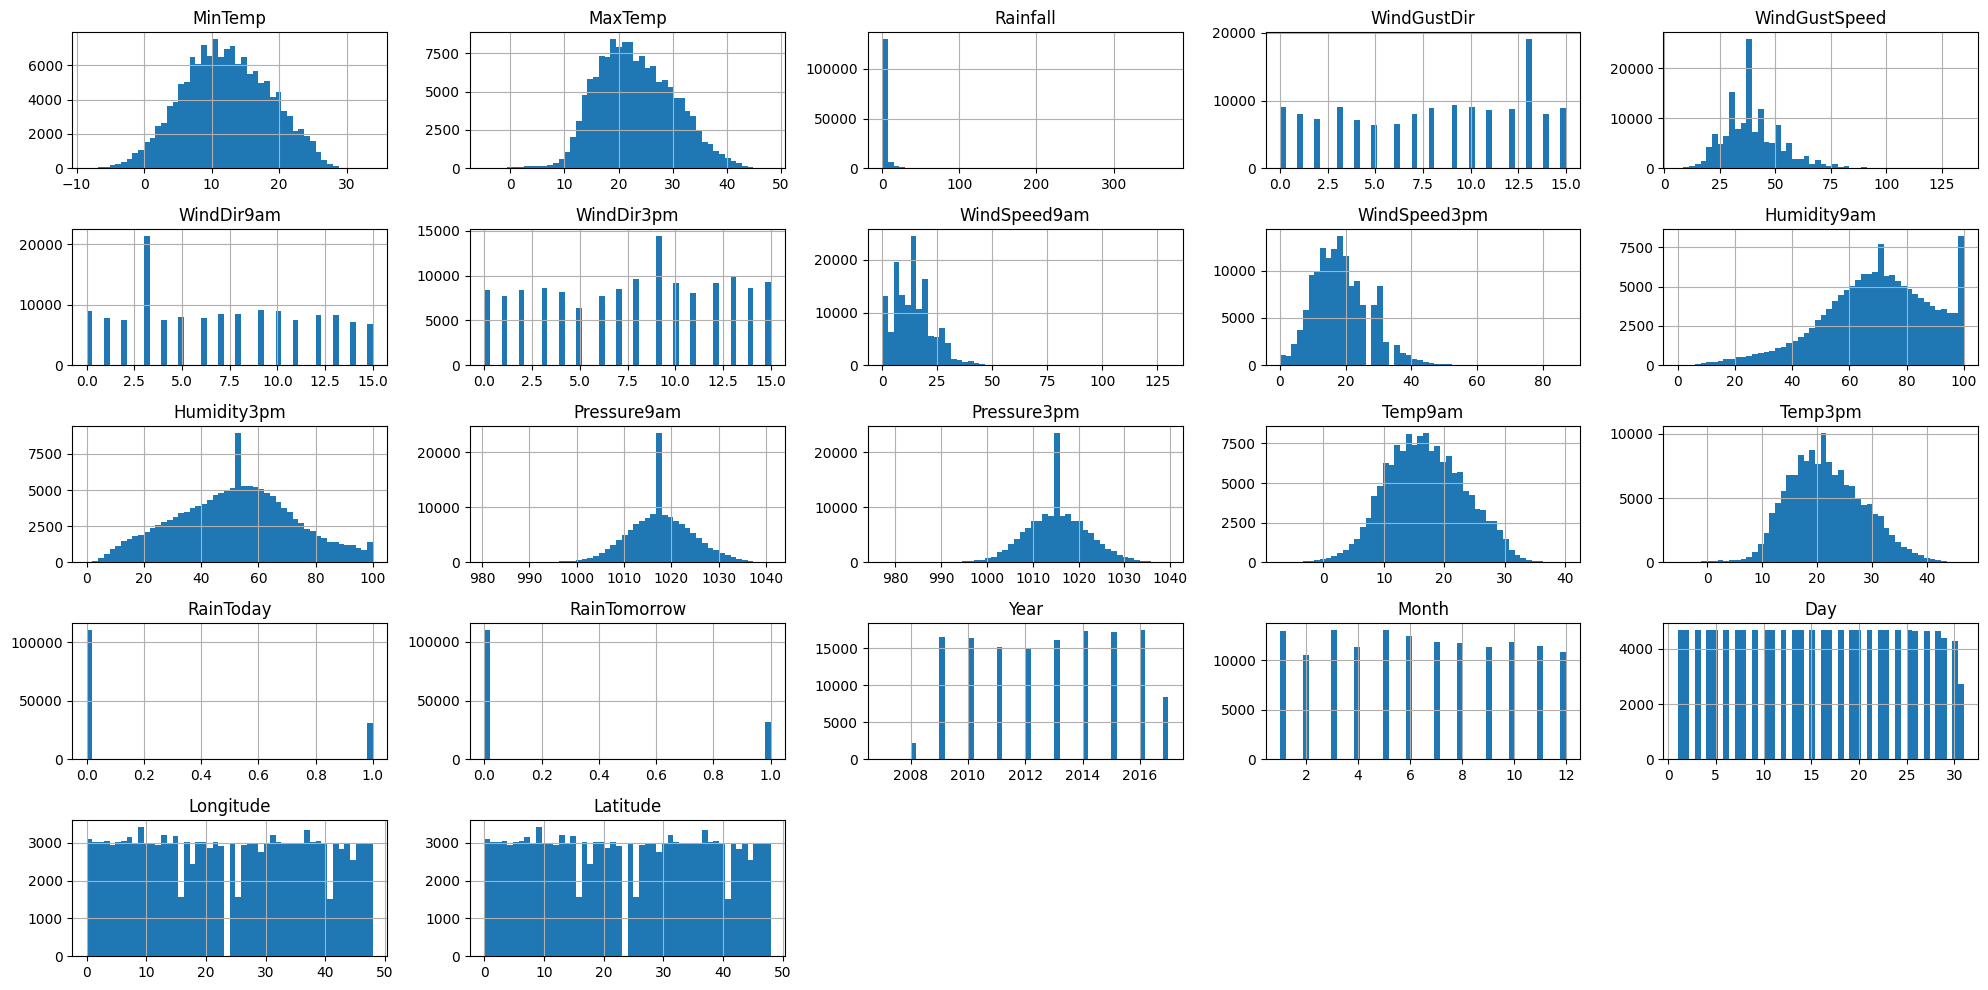

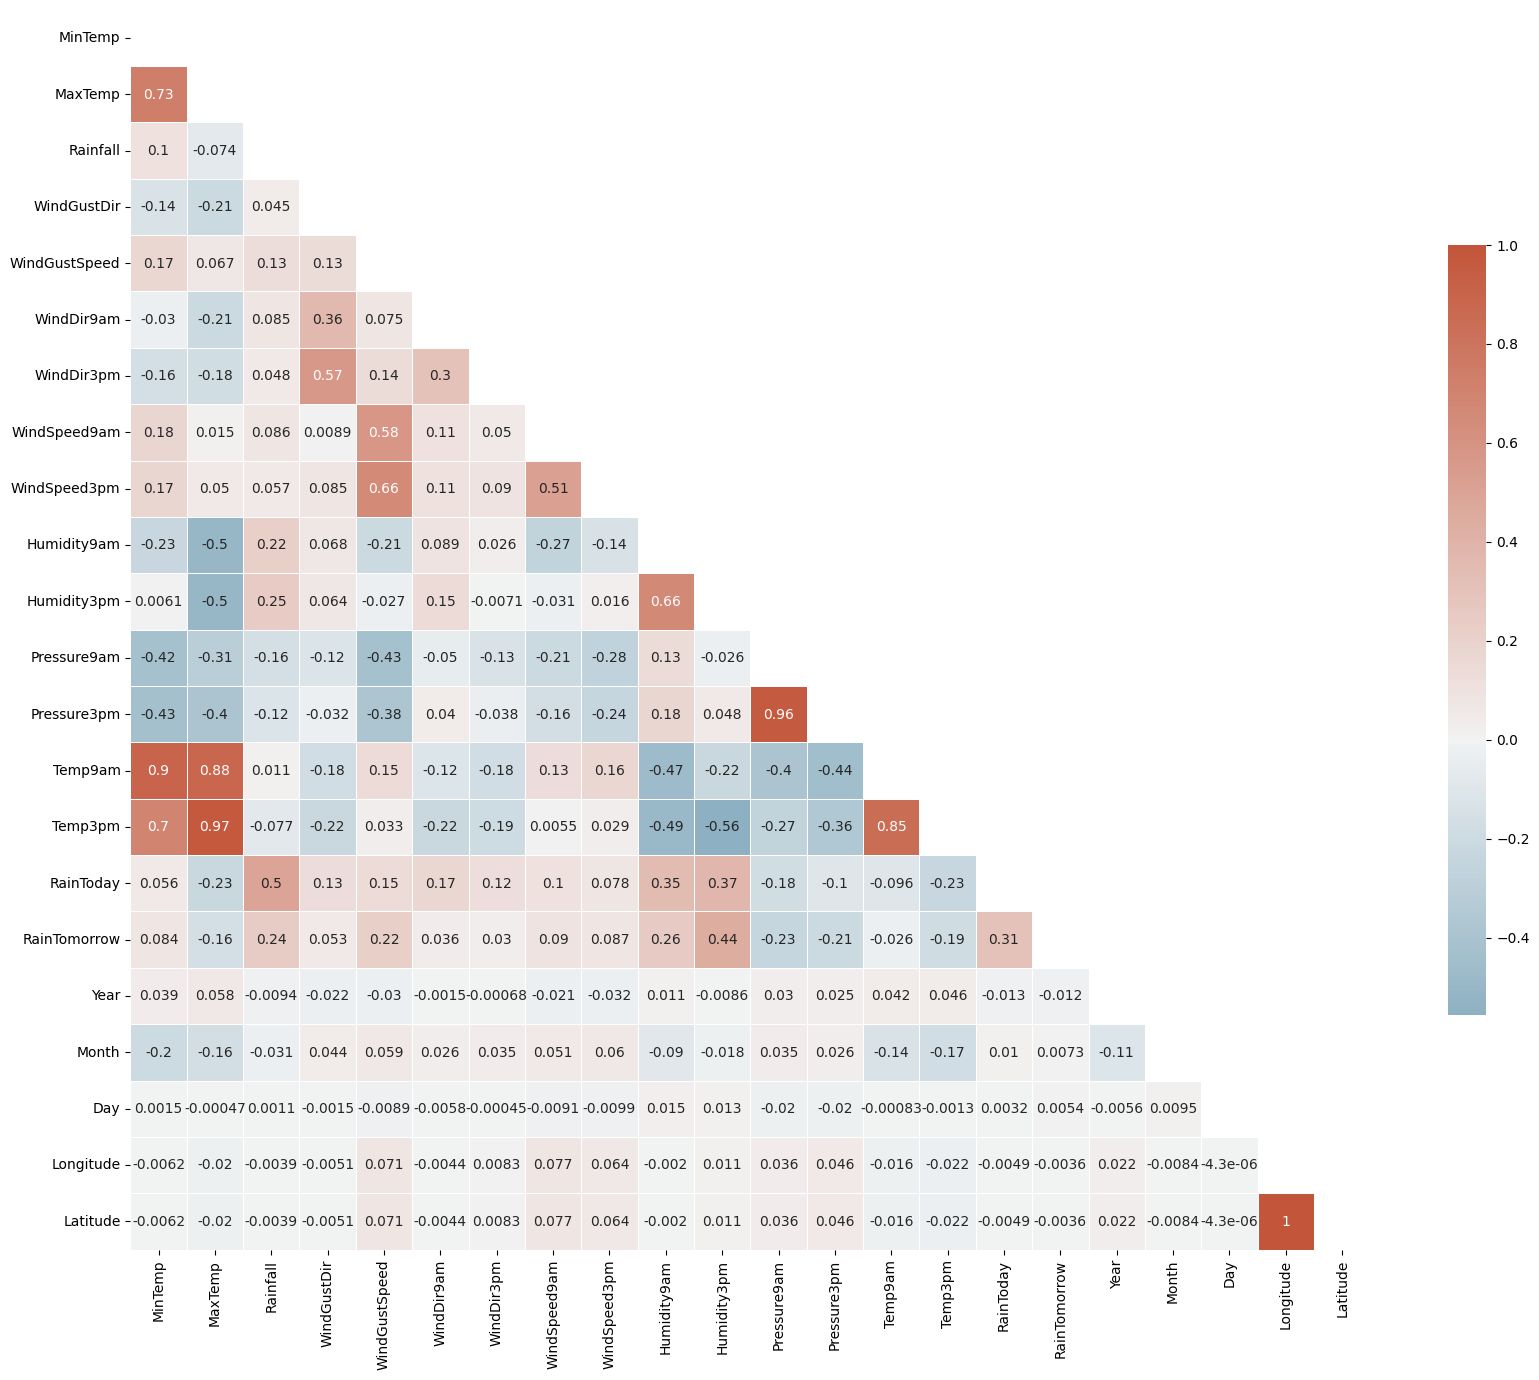

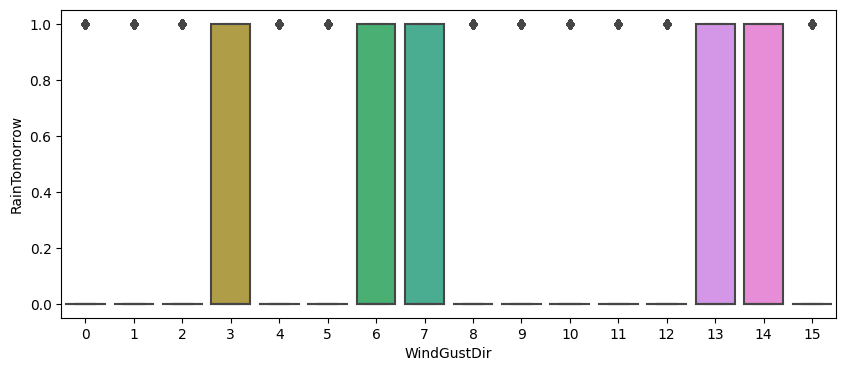

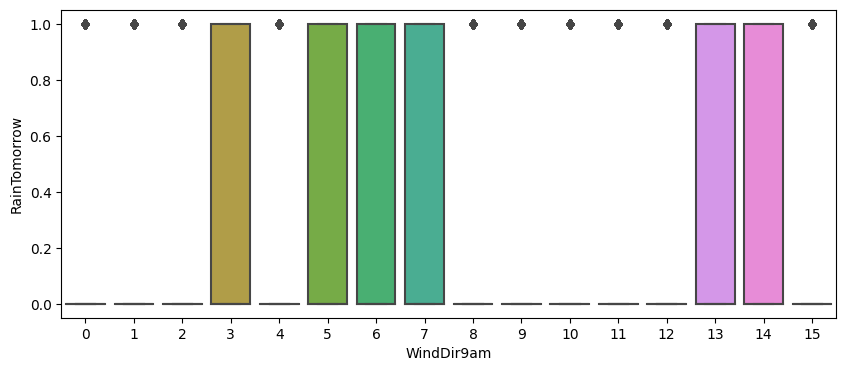

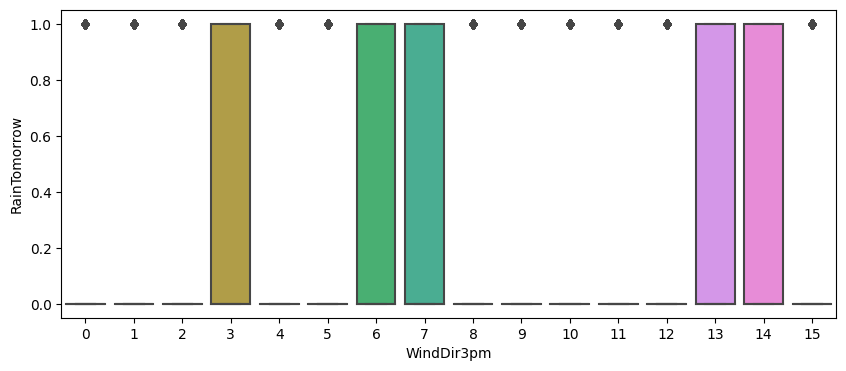

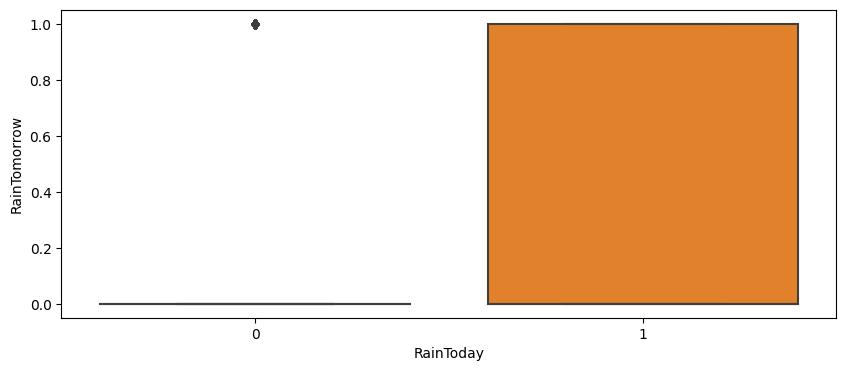

In [10]:
# Visualize the distribution of all the numerical variables
data.hist(bins=50, figsize=(20,10))
plt.tight_layout()
plt.show()

# Calculate correlations
corr_matrix = data.corr()

# Generate a mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Boxplots for categorical variables
categorical_variables = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='RainTomorrow', data=data)

We have successfully transformed the date into 'Year', 'Month' and 'Day', and transformed 'Location' into 'Longitude' and 'Latitude and created the correlations visualizations '. 

Now let's perform hyperparameter tuning for both the logistic regression and random forest classification models using GridSearchCV. GridSearchCV allows us to build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let's proceed with this. I will run the grid search for logistic regression and random forest separately due to the computational demand. Note that the real tuning process might take a long time due to a large amount of combinations to evaluate, and I'm simplifying it here for the demonstration purpose.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1, 0.1, 0.01],
}
grid_lr = GridSearchCV(lr, lr_params, cv=3, verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)

lr_best_params = grid_lr.best_params_
lr_best_params

Fitting 3 folds for each of 12 candidates, totalling 36 fits
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C 

{'C': 1, 'penalty': 'none'}

The optimal hyperparameters for the Logistic Regression model were found to be 'C': 1 and 'penalty': 'none'. However, note that there were fitting problems with 'l1' and 'elasticnet' penalties as the 'lbfgs' solver (default solver for sklearn's logistic regression) doesn't support them.

Now, let's proceed with hyperparameter tuning for the Random Forest Classifier using GridSearchCV. I will define the grid with a range of values for 'n_estimators' (the number of trees in the forest) and 'max_depth' (the maximum depth of the tree). These two parameters can greatly influence how well the model fits the data.

In [ ]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
}
grid_rf = GridSearchCV(rf, rf_params, cv=3, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

rf_best_params = grid_rf.best_params_
rf_best_params

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'max_depth': None, 'n_estimators': 200}

Well, Let's rerun the model with the best parameters and show the new accuracy

In [ ]:
# Let's rerun our models with the optimal parameters

# Logistic Regression
lr = LogisticRegression(C=1, penalty='none')
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Random Forest Classifier
rf = RandomForestClassifier(max_depth=None, n_estimators=200)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

lr_accuracy, rf_accuracy

(0.8377326644474659, 0.8538609405035398)

# Save the model

Let's save the model for deployment later

In [ ]:
# Import the library for model saving
from joblib import dump

# Save Logistic Regression and Random Forest Classifier models
dump(lr, 'logistic_regression_model.joblib')
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

I have saved both the Logistic Regression and Random Forest Classifier models using joblib. The saved models "logistic_regression_model.joblib" and "random_forest_model.joblib" can be loaded later for deployment or further usage.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de74ada6-6892-4c01-99ac-0f5c069852c8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>